<a href="https://colab.research.google.com/github/Lav168/PRODIGY_DS_01/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


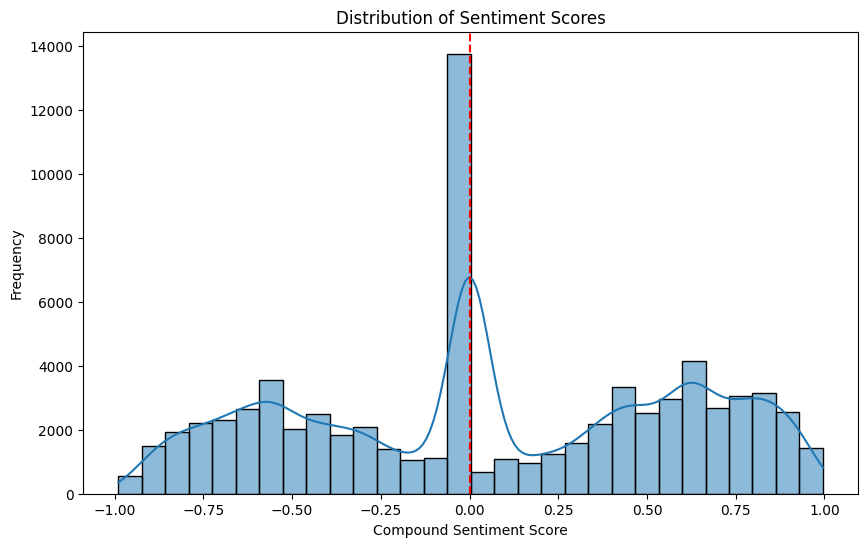

<ipython-input-4-d5e9dcbf72a6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Compound', y='topic', data=average_sentiment, palette='viridis')


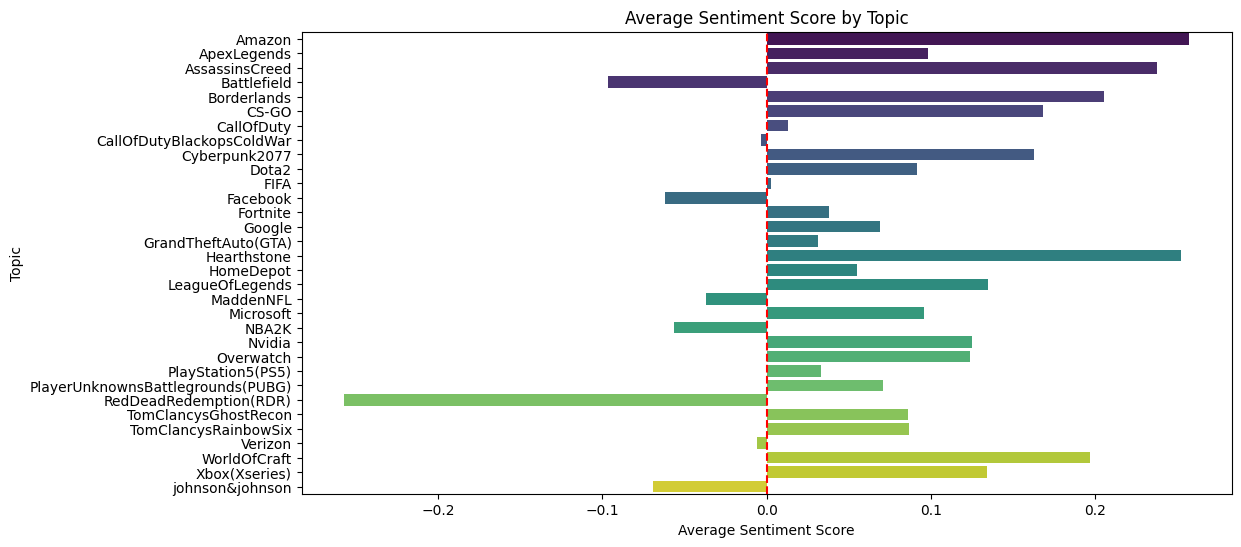

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

twitter_train = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None)
twitter_val = pd.read_csv('/content/drive/MyDrive/twitter_validation.csv', header=None)

twitter_train.columns = ['tweet_id', 'topic', 'sentiment', 'tweet_text']
twitter_val.columns = ['tweet_id', 'topic', 'sentiment', 'tweet_text']

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):  # Check if the text is a string
        return sia.polarity_scores(text)
    return {'compound': 0}  # Return neutral sentiment for non-string inputs

twitter_train.dropna(subset=['tweet_text'], inplace=True)

twitter_train['Sentiment'] = twitter_train['tweet_text'].apply(get_sentiment)
twitter_train['Compound'] = twitter_train['Sentiment'].apply(lambda x: x['compound'])

plt.figure(figsize=(10, 6))
sns.histplot(twitter_train['Compound'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

average_sentiment = twitter_train.groupby('topic')['Compound'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Compound', y='topic', data=average_sentiment, palette='viridis')
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Topic')
plt.axvline(0, color='red', linestyle='--')
plt.show()
